In [ ]:
pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 625.9 kB/s eta 0:00:00


In [ ]:
pip install wordsegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 12.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef, ConfusionMatrixDisplay
# from utils import convert_bool_to_int
from sklearn.model_selection import train_test_split# Text pre-processing
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping# Modeling
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import ast
from sklearn.model_selection import train_test_split# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional, RepeatVector
import tqdm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from fast_ml.model_development import train_valid_test_split
from wordsegment import load, segment
from sklearn.model_selection import cross_val_score, cross_validate
from keras.callbacks import ModelCheckpoint
import keras
from keras import layers
from keras import initializers
from tensorflow.keras import regularizers

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive")

In [ ]:
def clean_block_list_new():
    phish = pd.read_csv(filepath_or_buffer='phish_new_jan.csv', sep=',',
                        header=0)
    phish['verification_time'] = pd.to_datetime(phish['verification_time'])
    phish = phish[phish['verification_time'].dt.year == 2023]
    phish[['protocol', 'urlNoProto']] = phish['url'].str.split('://', expand=True, n=1)
    phish = phish.drop(phish[phish.protocol == "http"].index)
    phish.reset_index(inplace=True)
    phish[['fullDomain', 'path']] = phish['urlNoProto'].str.split('/', expand=True, n=1)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('google.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('amazonaws.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('godaddysites.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('weeblysite.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('mybluehost.me')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('inmotionhosting.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('firebaseapp.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('googleapis.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('azurefd.net')].index)
    phish.reset_index(inplace=True)
    phish['fullDomain'] = phish['fullDomain'].str.replace('www.', '')
    return phish

def clean_block_list():
    phish = pd.read_csv(filepath_or_buffer='phishtank.csv', sep=',',
                        header=0)
    phish['verification_time'] = pd.to_datetime(phish['verification_time'])
    phish = phish[phish['verification_time'].dt.year == 2023]
    phish[['protocol', 'urlNoProto']] = phish['url'].str.split('://', expand=True, n=1)
    phish = phish.drop(phish[phish.protocol == "http"].index)
    phish.reset_index(inplace=True)
    phish[['fullDomain', 'path']] = phish['urlNoProto'].str.split('/', expand=True, n=1)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('google.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('amazonaws.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('godaddysites.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('weeblysite.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('mybluehost.me')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('inmotionhosting.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('firebaseapp.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('googleapis.com')].index)
    phish = phish.drop(phish[phish['fullDomain'].str.endswith('azurefd.net')].index)
    phish.reset_index(inplace=True)
    phish['fullDomain'] = phish['fullDomain'].str.replace('www.', '')
    return phish

phish_old = clean_block_list()
phish_new = clean_block_list_new()
phish_lstm = [element for element in phish_new.fullDomain if element not in phish_old.fullDomain]

def top_tranco():
    tranco_raw = pd.read_csv(filepath_or_buffer='tranco.csv', sep=',',
                             header=0)
    return tranco_raw.drop(tranco_raw[tranco_raw['rank'] > 50000].index).sample(n=25000)


tranco_lstm = top_tranco()
tranco_lstm["phish"] =0

df1 = pd.DataFrame({'domain': phish_lstm, 'phish': 1})
# df1 = df1.sample(n=10000)
df_lstm = df1.append(tranco_lstm.drop(columns = ["rank"]))

In [ ]:
################################
# Create "sentences" from domain names using word segmentation on each token
################################

sentences = []
load()
for domain in df_lstm.domain:
    parts = domain.split(".")
    sentence = ""
    for part in parts:
        segments = segment(part)
        bit = " ".join(segments)
        sentence = sentence + " " + bit
    sentences.append(sentence)
df_lstm["domain_sent"] = sentences

In [ ]:
df_lstm = pd.read_pickle("df_lstm_withSentences.pkl")

In [ ]:
df_lstm

,domain,phish,domain_sent
0,secureatttttttttt.weebly.com,1,secure att tttt tttt weebl y com
1,conf-bn-cr027.webcindario.com,1,confbncr027 webcindario com
2,new.express.adobe.com,1,new express adobe com
3,auhlbrncs.info,1,au hlb rncs info
4,cloudflare-ipfs.com,1,cloud flare i pfs com
...,...,...,...
15145,his.com,0,his com
33522,moph.go.th,0,moph go th
7237,netcraft.com,0,netcraft com
37508,lexware.de,0,lexware de


In [ ]:
import pickle

with open('lstme_sentences.pickle', 'wb') as handle:
    pickle.dump(df_lstm, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
keras.utils.set_random_seed(812)



In [ ]:
#############################
# tokenize the sentences
#############################

# df = df_lstm
# df.drop_duplicates(subset=["serial_number"], inplace=True)
# df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
# df.reset_index(drop=True, inplace=True)
# labels = df_lstm["phish"]
# x_train, x_test, y_train, y_test = train_test_split(df_lstm['domain_sent'], labels, test_size=0.25, random_state=434)

x_train, y_train, x_valid, y_valid, x_test, y_test = train_valid_test_split(df_lstm[['domain_sent', "phish"]], target = 'phish',
                                                                            train_size=0.75, valid_size=0.1, test_size=0.15, random_state=42)

x_train = x_train["domain_sent"]
x_valid = x_valid["domain_sent"]
x_test = x_test["domain_sent"]
# Defining pre-processing parameters
max_len = 50
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'  # out of vocabulary token
vocab_size = 2000

tokenizer = Tokenizer(num_words = vocab_size,
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                            maxlen = max_len,
                            padding = padding_type,
                            truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen=max_len,
                               padding=padding_type,
                               truncating=trunc_type)

print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (37609, 50)
Shape of testing tensor:  (7523, 50)


In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#######################
# Set up model
#######################

n_lstm = 128
drop_lstm = 0.2
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     64,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(128,
                              return_sequences = True)))
model2.add(Bidirectional(LSTM(64,
                              return_sequences = False)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L2(l2=0.05)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.05)))
# model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ['accuracy'])


# checkpoint = ModelCheckpoint("test_model_epoch_{epoch:04d}.keras", monitor='val_accuracy', verbose=1, mode='auto', period=1)

num_epochs = 200
batch_size = 1024
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history_model2 = model2.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     batch_size=batch_size,
                     validation_data=(testing_padded, y_test),
                    #  callbacks =[checkpoint],
                     verbose=2)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 64)            128000    
                                                                 
 bidirectional_12 (Bidirect  (None, 50, 256)           197632    
 ional)                                                          
                                                                 
 bidirectional_13 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)              

In [ ]:
new_seq = tokenizer.texts_to_sequences(x_valid)
padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
model2.evaluate(padded, y_valid)

157/157 [==============================] - 1s 7ms/step - loss: 0.2700 - accuracy: 0.9350


[0.2700170874595642, 0.9349820613861084]

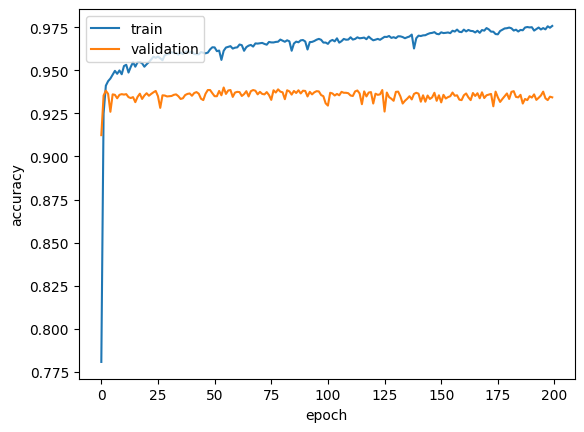

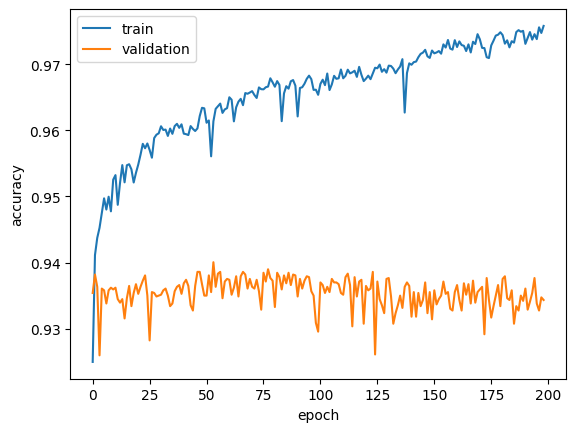

In [ ]:
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("lstm_model_accuracy_all.pdf")
plt.show()

plt.plot(history_model2.history['accuracy'][1:])
plt.plot(history_model2.history['val_accuracy'][1:])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("lstm_model_accuracy_zoomed.pdf")
plt.show()

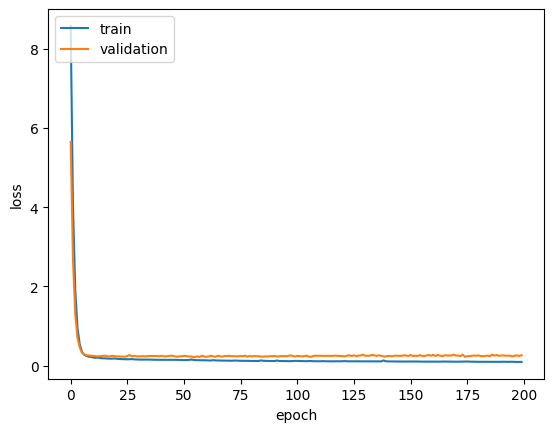

In [ ]:
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("lstm_loss.pdf")
plt.show()


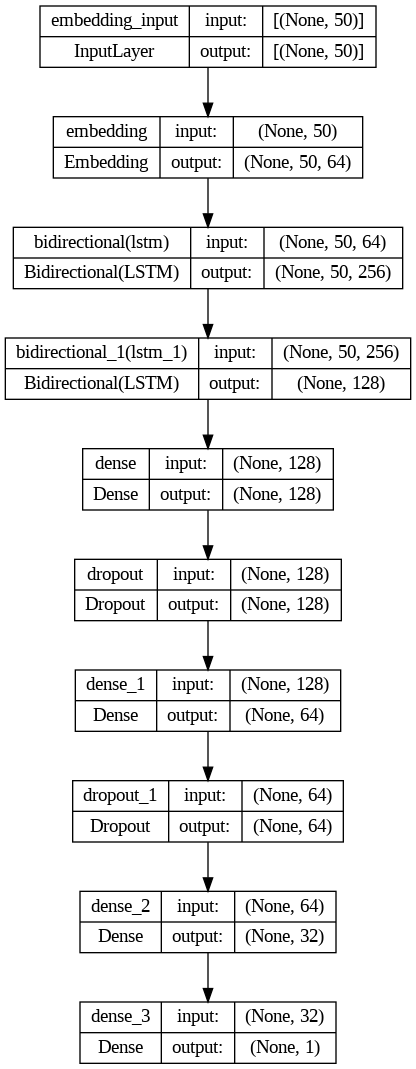

In [ ]:
from keras.utils import plot_model
plot_model(model2, to_file='lstmModelPlot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#######################
# Set up model
#######################

n_lstm = 128
drop_lstm = 0.2
model2 = Sequential()
model2.add(Embedding(vocab_size,
                     64,
                     input_length = max_len))
model2.add(Bidirectional(LSTM(128,
                              return_sequences = True)))
model2.add(Bidirectional(LSTM(64,
                              return_sequences = False)))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L2(l2=0.05)))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.05)))
# model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()


model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ['accuracy'])


# checkpoint = ModelCheckpoint("test_model_epoch_{epoch:04d}.keras", monitor='val_accuracy', verbose=1, mode='auto', period=1)

num_epochs = 75
batch_size = 1024
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history_model2 = model2.fit(training_padded,
                     y_train,
                     epochs=num_epochs,
                     batch_size=batch_size,
                     validation_data=(testing_padded, y_test),
                    #  callbacks =[checkpoint],
                     verbose=2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 50, 64)            128000    
                                                                 
 bidirectional_14 (Bidirect  (None, 50, 256)           197632    
 ional)                                                          
                                                                 
 bidirectional_15 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               16512     
                                                                 
 dropout_14 (Dropout)        (None, 128)              

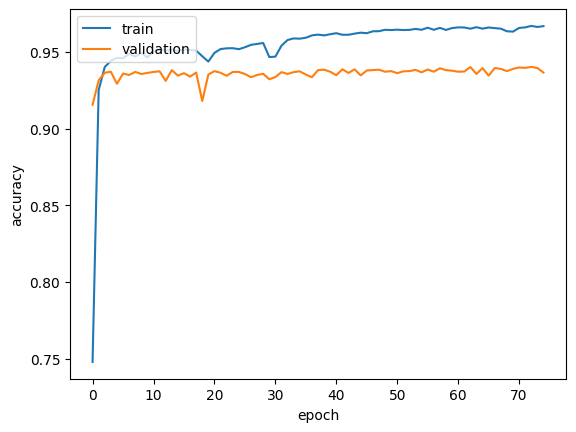

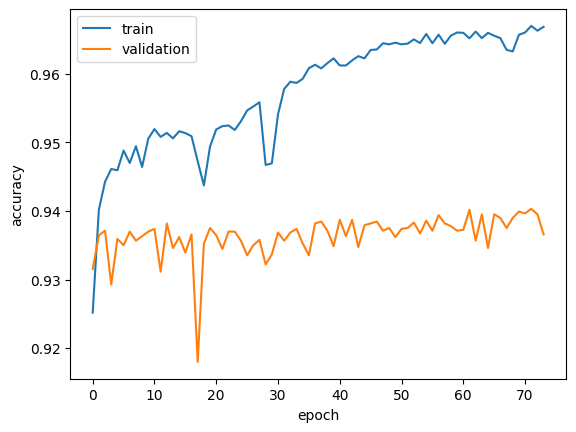

In [ ]:
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("lstm_model_accuracy_final.pdf")
plt.show()

plt.plot(history_model2.history['accuracy'][1:])
plt.plot(history_model2.history['val_accuracy'][1:])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("lstm_model_accuracy_zoomed_final.pdf")
plt.show()

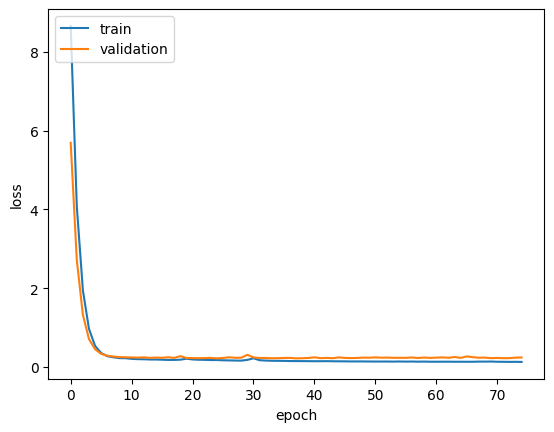

In [ ]:
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
# plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("lstm_loss_final.pdf")
plt.show()


In [ ]:
model2.save("finalModel.keras")

In [ ]:
loaded_model = keras.saving.load_model("finalModel.keras")

In [ ]:
new_seq = tokenizer.texts_to_sequences(x_valid)
padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
loaded_model.evaluate(padded, y_valid)

157/157 [==============================] - 21s 77ms/step - loss: 0.2586 - accuracy: 0.9328


[0.25857868790626526, 0.9327881932258606]

In [ ]:
# def create_model(max_len):
#   n_lstm = 128
#   drop_lstm = 0.2
#   model = Sequential()
#   model.add(Embedding(vocab_size,
#                       64,
#                       input_length = max_len))
#   model.add(Bidirectional(LSTM(128,
#                                 return_sequences = True)))
#   model.add(Bidirectional(LSTM(64,
#                                 return_sequences = False)))
#   model.add(Dropout(0.3))
#   model.add(Dense(128, activation='relu'))
#   model.add(Dropout(0.3))
#   model.add(Dense(64, activation='relu'))
#   model.add(Dense(32, activation='relu'))
#   model.add(Dense(1, activation='sigmoid'))
#   model.compile(loss = 'binary_crossentropy',
#                optimizer = "Adam",
#                metrics = ['accuracy'])

#   return model


In [ ]:
# model = create_model(max_len)
# model.summary()
# load_weights('model_epoch_0030.keras')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            64000     
                                                                 
 bidirectional_2 (Bidirecti  (None, 50, 256)           197632    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)              

In [ ]:
# model.load_weights('test_model_epoch_0020.keras')

In [ ]:
new_seq = tokenizer.texts_to_sequences(df_class["domain_sent"])
padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
model.evaluate(padded, df_class["phish"])

376/376 [==============================] - 4s 11ms/step - loss: 0.5665 - accuracy: 0.7221


[0.5664657354354858, 0.7221205234527588]

In [ ]:
df_class = pd.read_pickle("balanced_final.pkl")

In [ ]:
df_class

,names,serial_number,subject_common_name,subject_country,subject_locality,subject_province,subject_organization,subject_num_fields,apple_ever_valid,microsoft_ever_valid,...,san_is_international,san_frac_vowels,san_frac_digits,san_has_digit_only_subdomain,san_mean_len_subdomains,san_valid_tld_iana,san_has_single_char_subdomain,san_char_diversity,san_alphabet_size,domain_sent
0,[denkc.shop],366504857763249856277849125738975780317575,denkc.shop,,,,,1,True,True,...,0.0,0.222222,0.000000,0.0,0.000000,1.0,0.000000,1.000000,9,denk c shop
1,"[b247.com.vn, mail.b247.com.vn, www.b247.com.vn]",284738735543501994713565001286746028311459,b247.com.vn,,,,,1,True,True,...,0.0,0.147059,0.264706,0.0,3.833333,1.0,0.000000,0.382353,13,b247 com vn
2,"[*.apprealizecards.com, apprealizecards.com]",359134860649975121230515155066068736172311,apprealizecards.com,,,,,1,True,True,...,0.0,0.378378,0.000000,0.0,0.500000,1.0,0.500000,0.351351,13,app realize cards com
3,"[acopgdywzr.duckdns.org, akkqpvukcp.duckdns.or...",341994358809335598613652640413025433400605,ikcwnlnyba.duckdns.org,,,,,1,True,True,...,0.0,0.226000,0.000000,0.0,10.000000,1.0,0.000000,0.013000,26,cqouskkrev duck dns org
4,"[*.24904122.workers.dev, 24904122.workers.dev]",275079334922121573454224969746097883665061,*.24904122.workers.dev,,,,,1,True,True,...,0.0,0.162162,0.432432,1.0,6.250000,1.0,0.500000,0.378378,14,lognmaile0979 24904122 workers dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,"[*.flirt4free.com, flirt4free.com]",381930136059629160252552465383694618102562,*.flirt4free.com,,,,,1,True,True,...,0.0,0.296296,0.074074,0.0,0.500000,1.0,0.500000,0.407407,11,flirt4 free com
12012,"[deploy.clipsal.com, schneider-electric.com, u...",3316113809360953127948746858956096245,www.schneider-electric.com,FR,Rueil Malmaison,Île-de-France,SCHNEIDER ELECTRIC INDUSTRIES SAS,5,True,True,...,0.0,0.329545,0.000000,0.0,3.500000,1.0,0.000000,0.227273,20,schneider electric com
12013,"[*.integration.hotmart.com, hotmart.com, integ...",347205169830656985798470596005562563320018,*.integration.hotmart.com,,,,,1,True,True,...,0.0,0.358491,0.000000,0.0,5.666667,1.0,0.333333,0.226415,12,hot mart com
12014,"[*.asset.ict.iau.ir, *.associations.iau.ir, *....",351643995823233563543089030412369677562655,*.asset.ict.iau.ir,,,,,1,True,True,...,0.0,0.524444,0.000000,0.0,3.075000,1.0,0.950000,0.106667,24,iau ir


In [ ]:
new_seq = tokenizer.texts_to_sequences(df_class["domain_sent"])
padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
model2.evaluate(padded, df_class["phish"])

376/376 [==============================] - 5s 14ms/step - loss: 0.5966 - accuracy: 0.7708


[0.5965505838394165, 0.7708055973052979]

In [ ]:
new_seq = tokenizer.texts_to_sequences(df_class["domain_sent"])
padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
new_model.evaluate(padded, df_class["phish"])

376/376 [==============================] - 30s 74ms/step - loss: 0.5966 - accuracy: 0.7708


[0.5965508222579956, 0.7708055973052979]

In [ ]:
extract_layer_model = tf.keras.Model(
    inputs=loaded_model.input,
    outputs=loaded_model.layers[-2].output
)

In [ ]:
new_seq = tokenizer.texts_to_sequences(df_class["domain_sent"])
padded = pad_sequences(new_seq,
                         maxlen = max_len,
                         padding = padding_type,
                         truncating = trunc_type)
pred = extract_layer_model.predict(padded)

376/376 [==============================] - 38s 97ms/step


In [ ]:
df_preds = pd.DataFrame(pred, columns=[f'lstm_feature_{i}' for i in range(len(pred[0]))])

In [ ]:
df_preds.to_pickle("df_preds_lstm_features.pkl")

In [ ]:

feature_names_domain = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "new_sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld_new",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish"
]

In [ ]:

def convert_bool_to_int(data):
    data["apple_ever_valid"] = data["apple_ever_valid"].astype(int)
    data["nss_ever_valid"] = data["nss_ever_valid"].astype(int)
    data["microsoft_ever_valid"] = data["microsoft_ever_valid"].astype(int)
    data["subject_has_country"] = data["subject_has_country"].astype(int)
    data["subject_has_province"] = data["subject_has_province"].astype(int)
    data["subject_has_locality"] = data["subject_has_locality"].astype(int)
    data["subject_has_common_name"] = data["subject_has_common_name"].astype(int)
    data["subject_only_cn"] = data["subject_only_cn"].astype(int)
    data["crl_dist_point_present"] = data["crl_dist_point_present"].astype(int)
    data["issuer_has_common_name"] = data["issuer_has_common_name"].astype(int)
    data["subject_is_empty"] = data["subject_is_empty"].astype(int)
    # data["valid_timestamps"] = data["valid_timestamps"].astype(int)
    data["authority_info_access"] = data["authority_info_access"].astype(int)
    data["certificate_policies"] = data["certificate_policies"].astype(int)
    data["basic_constraints"] = data["basic_constraints"].astype(int)
    # data["key_usage_present"] = data["key_usage_present"].astype(int)
    # data["extended_key_usage_present"] = data["extended_key_usage_present"].astype(int)
    # data["signed_certificate_timestamp"] = data["signed_certificate_timestamp"].astype(int)
    data["authority_key_id"] = data["authority_key_id"].astype(int)
    # data["in_phish"] = data["in_phish"].astype(int)
    return data


In [ ]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names_domain]
df_features_merged = df_features.join(df_preds)#, left_index=True, right_index=True)
# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features_merged = pd.get_dummies(df_features_merged,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features_merged.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features_merged = convert_bool_to_int(df_features_merged)
df_features_merged.dropna(axis=0, inplace=True)
features = df_features_merged.drop(columns=["phish"], axis=1)
labels = df_features_merged["phish"]

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [ ]:
features.columns

Index(['apple_ever_valid', 'nss_ever_valid', 'microsoft_ever_valid',
       'subject_has_country', 'subject_has_province', 'subject_has_locality',
       'subject_has_common_name', 'subject_only_cn', 'subject_len',
       'length_seconds', 'ocsp_urls', 'crl_dist_point_present',
       'num_san_dns_names', 'version', 'len_serial_number', 'len_issuer_dn',
       'issuer_has_common_name', 'subject_is_empty', 'lcs_sans',
       'lcs_sans_normed', 'authority_info_access', 'certificate_policies',
       'basic_constraints', 'key_usage_value', 'authority_key_id',
       'domain_len', 'new_sus_keyword', 'sus_tld', 'shannon_entropy',
       'num_dashes', 'num_tokens', 'num_parts', 'token_is_tld_new',
       'frac_special_char', 'is_international', 'frac_vowels', 'frac_digits',
       'has_digit_only_subdomain', 'mean_len_subdomains',
       'has_single_char_subdomain', 'char_diversity', 'alphabet_size',
       'is_wildcard_match', 'has_wildcard_san', 'lstm_feature_0',
       'lstm_feature_1', '

In [ ]:
results_df = pd.DataFrame()



print("-------- Random Forrest ----------")
rf = RandomForestClassifier(n_estimators=50, random_state=42)
cv_results = cross_validate(rf, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
MyColumns = pd.MultiIndex.from_tuples([("Fold" , ""),
                                       ("Random forest" , "F1-score"),
                                      ("Random forest", "accuracy")])

model_results_df = pd.DataFrame(columns = MyColumns)

model_results_df["Fold"] = [1, 2, 3, 4, 5] + ['Average']
model_results_df[("Random forest" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
model_results_df[("Random forest" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
results_df = pd.concat([results_df, model_results_df], ignore_index=True)
print(f"5-fold cross validation {cv_results}")
rf.fit(train_scaled, train_labels)
pred = rf.predict(test_scaled)
print(rf.score(train_scaled, train_labels))
print(f"Test score: {rf.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ---- 10 ------")
knn = KNeighborsClassifier(n_neighbors=10)
print(f"5-fold cross validation {cross_validate(knn, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))}")
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


print("-------- KNN ----- 3 -----")
knn = KNeighborsClassifier(n_neighbors=3)
cv_results = cross_validate(knn, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("KNN" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("KNN" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled)
print(knn.score(train_scaled, train_labels))
print(f"Test score: {knn.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---sigmoid --- 0.03 ----")
svm = SVC(kernel="sigmoid", C=0.03)
print(f"5-fold cross validation {cross_validate(svm, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

print("-------- SVM ---linear --- 0.03 ----")
svm = SVC(kernel="linear", C=0.03)
cv_results = cross_validate(svm, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))
accuracy_scores = cv_results['test_accuracy']
f1_scores = cv_results['test_f1']
avg_accuracy = accuracy_scores.mean()
avg_f1 = f1_scores.mean()
print(f"5-fold cross validation {cv_results}")
results_df[("SVM" , "F1-score")] =  f1_scores.tolist() + [avg_f1]
results_df[("SVM" , "accuracy")] =  accuracy_scores.tolist() + [avg_accuracy]
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="sigmoid", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---sigmoid --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=1.0)
print(f"5-fold cross validation {cross_validate(svm, train_scaled, train_labels, cv=5, scoring=('accuracy', 'f1'))}")
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled)
print("-------- SVM ---linear --- 1.0 ----")
print(svm.score(train_scaled, train_labels))
print(f"Test score: {svm.score(test_scaled, test_labels)}")
print(f"Accuracy: {accuracy_score(test_labels, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels, pred))
print(f"F1 score: {f1_score(test_labels, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



-------- Random Forrest ----------
5-fold cross validation {'fit_time': array([1.01400113, 1.40322542, 1.46701431, 1.1457324 , 1.01730037]), 'score_time': array([0.02293539, 0.02767277, 0.03382063, 0.02145743, 0.02178049]), 'test_accuracy': array([0.88073908, 0.88297872, 0.88745801, 0.87569989, 0.87787115]), 'test_f1': array([0.87959299, 0.88317496, 0.88454911, 0.87372014, 0.87613636])}
0.9995520215029678
Test score: 0.8908296943231441
Accuracy: 0.8908296943231441
Confusion matrix
[[1324  149]
 [ 176 1328]]
F1 score: 0.8909761824890976
MCC: 0.7818055599254108
-------- KNN ---- 10 ------
5-fold cross validation {'fit_time': array([0.00727057, 0.00520825, 0.00450373, 0.00469661, 0.00500584]), 'score_time': array([0.26912522, 0.20010376, 0.20002675, 0.27998996, 0.23861432]), 'test_accuracy': array([0.85106383, 0.84882419, 0.84546473, 0.84826428, 0.84593838]), 'test_f1': array([0.84480747, 0.84356895, 0.83551847, 0.84142774, 0.83737433])}
0.8695262627393885
Test score: 0.8525361101780315
A

In [ ]:
from joblib import dump, load
dump(rf, 'randomForest.joblib')

['randomForest.joblib']

In [ ]:
print(results_df.to_latex(index=False, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
   Fold & \multicolumn{2}{l}{Random forest} & \multicolumn{2}{l}{KNN} & \multicolumn{2}{l}{SVM} \\
        &      F1-score & accuracy & F1-score & accuracy & F1-score & accuracy \\
\midrule
      1 &          0.88 &     0.88 &     0.84 &     0.84 &     0.84 &     0.85 \\
      2 &          0.88 &     0.88 &     0.85 &     0.85 &     0.86 &     0.86 \\
      3 &          0.88 &     0.89 &     0.84 &     0.85 &     0.84 &     0.85 \\
      4 &          0.87 &     0.88 &     0.83 &     0.83 &     0.85 &     0.85 \\
      5 &          0.88 &     0.88 &     0.84 &     0.84 &     0.85 &     0.85 \\
Average &          0.88 &     0.88 &     0.84 &     0.84 &     0.85 &     0.85 \\
\bottomrule
\end{tabular}



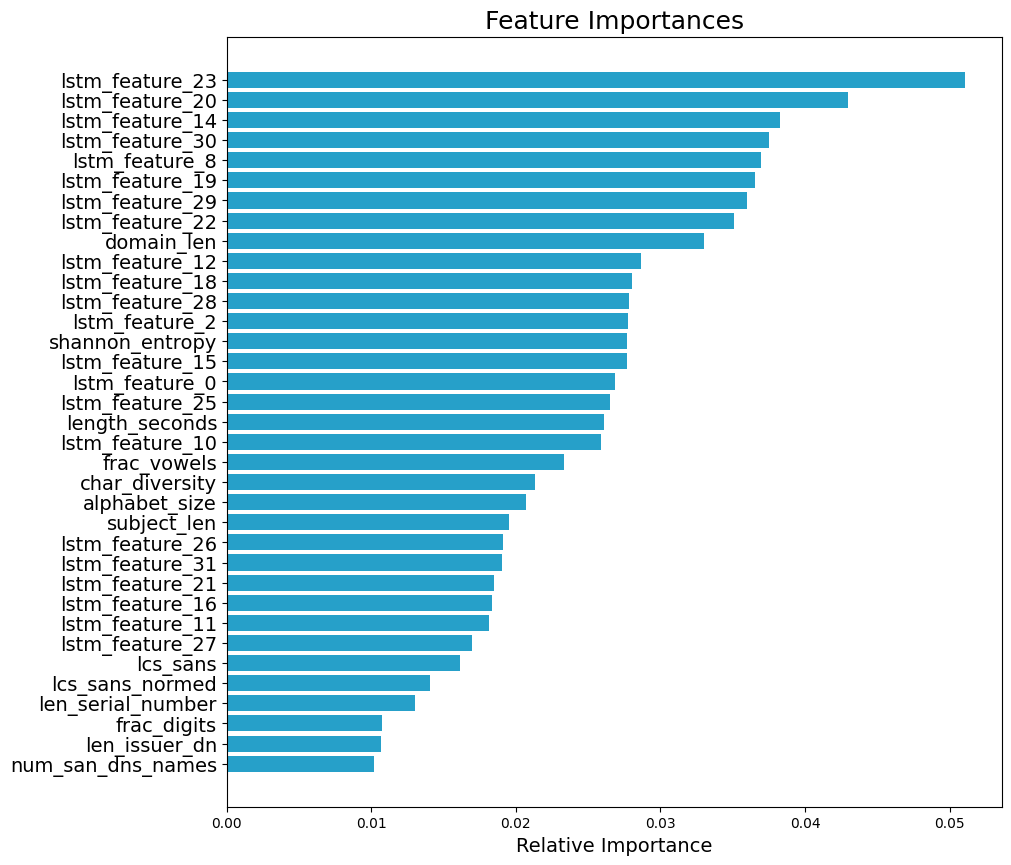

In [ ]:
features_cols = features.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))

plt.title('Feature Importances', fontsize=18)
plt.barh(range(0,35), importances[indices[-35:]], color='#26A0C9', align='center')
plt.yticks(range(0,35), [features_cols[i] for i in indices[-35:]], fontsize=14)
plt.xlabel('Relative Importance', fontsize=14)
plt.savefig("featureImportanceLSTMfeatures.pdf", bbox_inches="tight")
plt.show()

In [ ]:
pred_prob = rf.predict_proba(test_scaled)
new_pred = []
thresholds = [x for x in np.arange(0.30, 1.0, 0.05)]
fn = []
fp = []

for thresh in thresholds:
    new_pred = []
    for value in pred_prob[:,0]:
        if value > thresh:
            new_pred.append(0)
        else:
            new_pred.append(1)
    fn.append(confusion_matrix(test_labels, new_pred)[1,0])
    fp.append(confusion_matrix(test_labels, new_pred)[0,1])

In [ ]:
new_pred_0_7 = []
for value in pred_prob[:,0]:
        if value > 0.5:
            new_pred_0_7.append(0)
        else:
            new_pred_0_7.append(1)

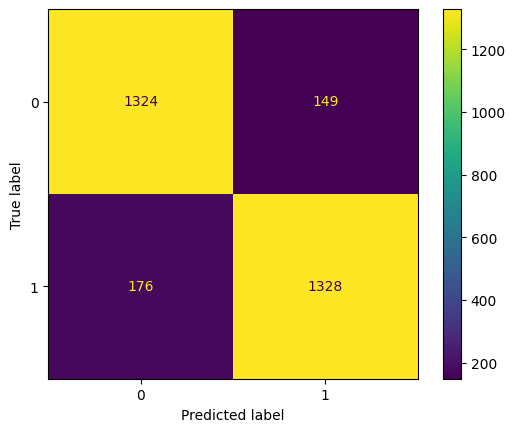

In [ ]:
plotConf = ConfusionMatrixDisplay(confusion_matrix(test_labels, rf.predict(test_scaled)))
plotConf.plot()
plt.savefig("conf_lstm.pdf")
plt.show()


In [ ]:
fn

[340, 296, 266, 210, 176, 144, 123, 91, 73, 57, 51, 26, 17, 2]

In [ ]:
thresholds

[0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.5999999999999999,
 0.6499999999999999,
 0.7,
 0.7499999999999999,
 0.7999999999999998,
 0.8499999999999999,
 0.8999999999999999,
 0.95]

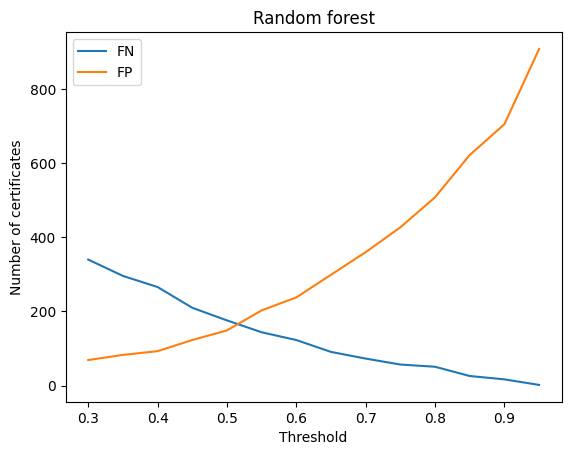

In [ ]:
plt.plot(thresholds, fn, label="FN")
plt.plot(thresholds, fp, label="FP")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Number of certificates")
plt.title("Random forest")
plt.savefig("thresholdsRF.pdf")
plt.show()

In [ ]:
svm = SVC(kernel="linear", C=0.03, probability=True)
svm.fit(train_scaled, train_labels)
new_pred = []
thresholds = [x for x in np.arange(0.30, 1.0, 0.05)]
fn = []
fp = []

pred_prob_SVM = svm.predict_proba(test_scaled)

for thresh in thresholds:
    new_pred = []
    for value in pred_prob_SVM[:,0]:
        if value > thresh:
            new_pred.append(0)
        else:
            new_pred.append(1)
    fn.append(confusion_matrix(test_labels, new_pred)[1,0])
    fp.append(confusion_matrix(test_labels, new_pred)[0,1])

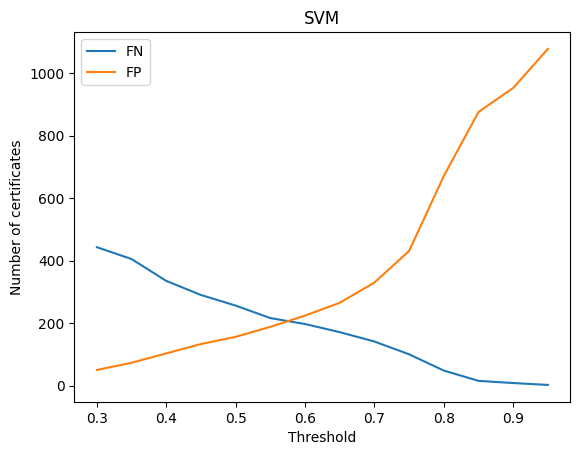

In [ ]:
plt.plot(thresholds, fn, label="FN")
plt.plot(thresholds, fp, label="FP")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Number of certificates")
plt.title("SVM")
plt.savefig("thresholdsSVM.pdf")
plt.show()

In [ ]:
new_pred = []
thresholds = [x for x in np.arange(0.30, 1.0, 0.05)]
fn = []
fp = []

pred_prob_knn = knn.predict_proba(test_scaled)

for thresh in thresholds:
    new_pred = []
    for value in pred_prob_knn[:,0]:
        if value > thresh:
            new_pred.append(0)
        else:
            new_pred.append(1)
    fn.append(confusion_matrix(test_labels, new_pred)[1,0])
    fp.append(confusion_matrix(test_labels, new_pred)[0,1])

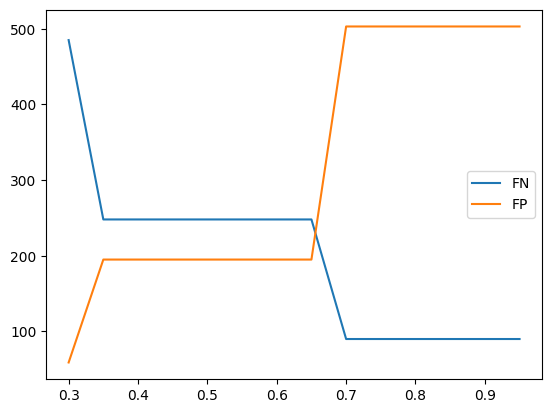

In [ ]:
plt.plot(thresholds, fn, label="FN")
plt.plot(thresholds, fp, label="FP")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_labels, pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

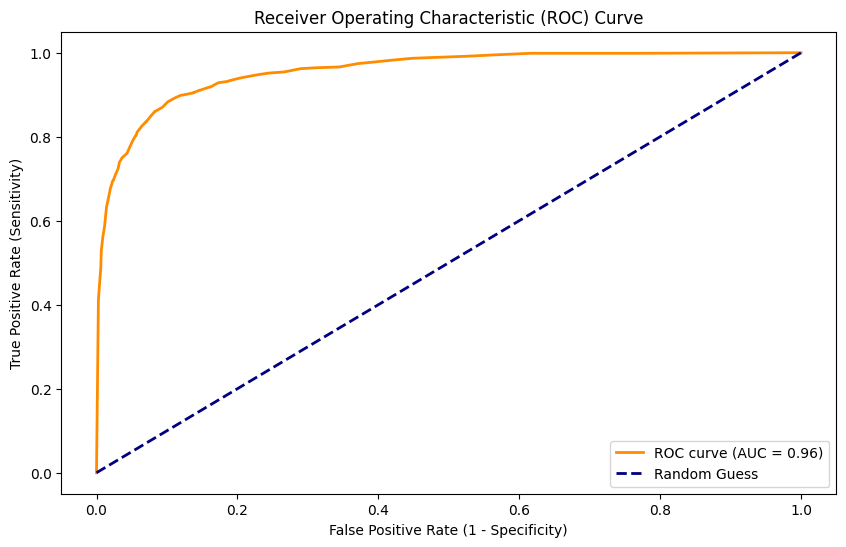

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("roc_lstm.pdf")
plt.show()

In [ ]:
df_class

,names,serial_number,subject_common_name,subject_country,subject_locality,subject_province,subject_organization,subject_num_fields,apple_ever_valid,microsoft_ever_valid,...,san_is_international,san_frac_vowels,san_frac_digits,san_has_digit_only_subdomain,san_mean_len_subdomains,san_valid_tld_iana,san_has_single_char_subdomain,san_char_diversity,san_alphabet_size,domain_sent
0,[denkc.shop],366504857763249856277849125738975780317575,denkc.shop,,,,,1,True,True,...,0.0,0.222222,0.000000,0.0,0.000000,1.0,0.000000,1.000000,9,denk c shop
1,"[b247.com.vn, mail.b247.com.vn, www.b247.com.vn]",284738735543501994713565001286746028311459,b247.com.vn,,,,,1,True,True,...,0.0,0.147059,0.264706,0.0,3.833333,1.0,0.000000,0.382353,13,b247 com vn
2,"[*.apprealizecards.com, apprealizecards.com]",359134860649975121230515155066068736172311,apprealizecards.com,,,,,1,True,True,...,0.0,0.378378,0.000000,0.0,0.500000,1.0,0.500000,0.351351,13,app realize cards com
3,"[acopgdywzr.duckdns.org, akkqpvukcp.duckdns.or...",341994358809335598613652640413025433400605,ikcwnlnyba.duckdns.org,,,,,1,True,True,...,0.0,0.226000,0.000000,0.0,10.000000,1.0,0.000000,0.013000,26,cqouskkrev duck dns org
4,"[*.24904122.workers.dev, 24904122.workers.dev]",275079334922121573454224969746097883665061,*.24904122.workers.dev,,,,,1,True,True,...,0.0,0.162162,0.432432,1.0,6.250000,1.0,0.500000,0.378378,14,lognmaile0979 24904122 workers dev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12011,"[*.flirt4free.com, flirt4free.com]",381930136059629160252552465383694618102562,*.flirt4free.com,,,,,1,True,True,...,0.0,0.296296,0.074074,0.0,0.500000,1.0,0.500000,0.407407,11,flirt4 free com
12012,"[deploy.clipsal.com, schneider-electric.com, u...",3316113809360953127948746858956096245,www.schneider-electric.com,FR,Rueil Malmaison,Île-de-France,SCHNEIDER ELECTRIC INDUSTRIES SAS,5,True,True,...,0.0,0.329545,0.000000,0.0,3.500000,1.0,0.000000,0.227273,20,schneider electric com
12013,"[*.integration.hotmart.com, hotmart.com, integ...",347205169830656985798470596005562563320018,*.integration.hotmart.com,,,,,1,True,True,...,0.0,0.358491,0.000000,0.0,5.666667,1.0,0.333333,0.226415,12,hot mart com
12014,"[*.asset.ict.iau.ir, *.associations.iau.ir, *....",351643995823233563543089030412369677562655,*.asset.ict.iau.ir,,,,,1,True,True,...,0.0,0.524444,0.000000,0.0,3.075000,1.0,0.950000,0.106667,24,iau ir


In [ ]:

feature_names_timebased = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish",
    "not_before_date"
]



features_san_domain_timebased = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "new_sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld_new",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish",
    "mean_san_domain_len",
    "san_sus_keyword",
    "san_sus_tld",
    "san_shannon_entropy",
    "san_num_dashes",
    "san_num_tokens",
    "san_num_parts",
    "san_token_is_tld",
    "san_frac_special_char",
    "san_is_ip",
    "san_is_international",
    "san_frac_vowels",
    "san_frac_digits",
    "san_has_digit_only_subdomain",
    "san_mean_len_subdomains",
    "san_valid_tld_iana",
    "san_has_single_char_subdomain",
    "san_char_diversity",
    "san_alphabet_size",
    "not_before_date"
]

In [ ]:
df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names_timebased]
df_features_merged = df_features.join(df_preds)#, left_index=True, right_index=True)
# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features_merged = pd.get_dummies(df_features_merged,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features_merged.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features_merged = convert_bool_to_int(df_features_merged)
df_features_merged.dropna(axis=0, inplace=True)


In [ ]:
df_features_merged.columns

Index(['apple_ever_valid', 'nss_ever_valid', 'microsoft_ever_valid',
       'subject_has_country', 'subject_has_province', 'subject_has_locality',
       'subject_has_common_name', 'subject_only_cn', 'subject_len',
       'length_seconds', 'ocsp_urls', 'crl_dist_point_present',
       'num_san_dns_names', 'version', 'len_serial_number', 'len_issuer_dn',
       'issuer_has_common_name', 'subject_is_empty', 'lcs_sans',
       'lcs_sans_normed', 'authority_info_access', 'certificate_policies',
       'basic_constraints', 'key_usage_value', 'authority_key_id',
       'domain_len', 'sus_keyword', 'sus_tld', 'shannon_entropy', 'num_dashes',
       'num_tokens', 'num_parts', 'token_is_tld', 'frac_special_char',
       'is_international', 'frac_vowels', 'frac_digits',
       'has_digit_only_subdomain', 'mean_len_subdomains',
       'has_single_char_subdomain', 'char_diversity', 'alphabet_size',
       'is_wildcard_match', 'has_wildcard_san', 'phish', 'not_before_date',
       'lstm_feature_0',

In [ ]:
train_1 = df_features_merged[df_features_merged.not_before_date < "2023-5-1"]
test_may = df_features_merged[(df_features_merged.not_before_date >= "2023-5-1") & (df_features_merged.not_before_date < "2023-6-1")]
test_june = df_features_merged[(df_features_merged.not_before_date >= "2023-6-1") & (df_features_merged.not_before_date < "2023-7-1")]
test_july = df_features_merged[(df_features_merged.not_before_date >= "2023-7-1") & (df_features_merged.not_before_date < "2023-8-1")]
test_august = df_features_merged[(df_features_merged.not_before_date >= "2023-8-1") & (df_features_merged.not_before_date < "2023-9-1")]
test_september = df_features_merged[(df_features_merged.not_before_date >= "2023-9-1") & (df_features_merged.not_before_date < "2023-10-1")]


In [ ]:
balanced

,apple_ever_valid,nss_ever_valid,microsoft_ever_valid,subject_has_country,subject_has_province,subject_has_locality,subject_has_common_name,subject_only_cn,subject_len,length_seconds,...,validation_level_OV,validation_level_UNKNOWN,pub_key_algorithm_3,pub_key_algorithm_5,signature_algorithm_name_ECDSA-SHA256,signature_algorithm_name_ECDSA-SHA384,signature_algorithm_name_SHA1-RSA,signature_algorithm_name_SHA256-RSA,signature_algorithm_name_SHA384-RSA,signature_algorithm_name_SHA512-RSA
0,1,1,1,0,0,0,1,1,10,7775999,...,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,1,22,7775999,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,0,0,0,1,1,22,7775999,...,0,0,0,1,0,1,0,0,0,0
5,1,1,1,0,0,0,1,1,20,7775999,...,0,0,1,0,0,0,0,1,0,0
6,1,1,1,0,0,0,1,1,24,7862399,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9472,1,1,1,0,0,0,1,1,16,7775999,...,0,0,1,0,0,0,0,1,0,0
7319,1,1,1,0,0,0,1,1,7,7775999,...,0,0,1,0,0,0,0,1,0,0
8269,1,1,1,0,0,0,1,1,14,7775999,...,0,0,1,0,0,0,0,1,0,0
9748,1,1,1,0,0,0,1,1,24,7775999,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
def balance_phish_tranco(df):
    phish = df[df.phish == 1]
    tranco = df[df.phish == 0]
    len_phish = len(phish)
    len_tranco = len(tranco)
    if len_phish > len_tranco:
        phish = phish.sample(n=len_tranco)
    else:
        tranco = tranco.sample(n=len_phish)
    return phish.append(tranco)

In [ ]:
balanced = balance_phish_tranco(train_1)

In [ ]:
features = balanced.drop(columns=["phish", "not_before_date"], axis=1)
train_labels = balanced["phish"]

# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
#                                                                             random_state=42)
scaler = preprocessing.StandardScaler().fit(features)

train_scaled = scaler.transform(features)
# test_scaled = scaler.transform(test_features)

In [ ]:
balanced

,apple_ever_valid,nss_ever_valid,microsoft_ever_valid,subject_has_country,subject_has_province,subject_has_locality,subject_has_common_name,subject_only_cn,subject_len,length_seconds,...,validation_level_OV,validation_level_UNKNOWN,pub_key_algorithm_3,pub_key_algorithm_5,signature_algorithm_name_ECDSA-SHA256,signature_algorithm_name_ECDSA-SHA384,signature_algorithm_name_SHA1-RSA,signature_algorithm_name_SHA256-RSA,signature_algorithm_name_SHA384-RSA,signature_algorithm_name_SHA512-RSA
0,1,1,1,0,0,0,1,1,10,7775999,...,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,1,22,7775999,...,0,0,1,0,0,0,0,1,0,0
4,1,1,1,0,0,0,1,1,22,7775999,...,0,0,0,1,0,1,0,0,0,0
5,1,1,1,0,0,0,1,1,20,7775999,...,0,0,1,0,0,0,0,1,0,0
6,1,1,1,0,0,0,1,1,24,7862399,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,1,1,1,0,0,0,1,1,11,7775999,...,0,0,1,0,0,0,0,1,0,0
6474,1,1,1,1,0,1,1,0,46,32659199,...,1,0,1,0,0,0,0,1,0,0
9802,1,1,1,0,0,0,1,1,18,7775999,...,0,0,1,0,0,0,0,1,0,0
11180,1,1,1,0,0,0,1,1,25,7775999,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
f1_scores_train = []
MCCs_train = []

In [ ]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(train_scaled, train_labels)
# pred = rf.predict(test_scaled)
# print("-------- Random Forrest ----------")
# print(rf.score(train_scaled, train_labels))
# print(f"Test score: {rf.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# f1 = f1_score(test_labels, pred)
# f1_scores_train.append(f1)
# print(f"F1 score: {f1}")
# mcc = matthews_corrcoef(test_labels, pred)
# MCCs_train.append(mcc)
# print(f"MCC: {mcc}")

# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(train_scaled, train_labels)
# pred = knn.predict(test_scaled)
# print("-------- KNN ---- 10 ------")
# print(knn.score(train_scaled, train_labels))
# print(f"Test score: {knn.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# print(f"F1 score: {f1_score(test_labels, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels, pred)}")


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_labels)
# pred = knn.predict(test_scaled)
# print("-------- KNN ----- 3 -----")
# print(knn.score(train_scaled, train_labels))
# print(f"Test score: {knn.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# print(f"F1 score: {f1_score(test_labels, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

# svm = SVC(kernel="sigmoid", C=0.03)
# svm.fit(train_scaled, train_labels)
# pred = svm.predict(test_scaled)
# print("-------- SVM ---sigmoid --- 0.03 ----")
# print(svm.score(train_scaled, train_labels))
# print(f"Test score: {svm.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# print(f"F1 score: {f1_score(test_labels, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

svm = SVC(kernel="linear", C=0.03)
svm.fit(train_scaled, train_labels)
# pred = svm.predict(test_scaled)
# print("-------- SVM ---linear --- 0.03 ----")
# print(svm.score(train_scaled, train_labels))
# print(f"Test score: {svm.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# print(f"F1 score: {f1_score(test_labels, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

# svm = SVC(kernel="sigmoid", C=1.0)
# svm.fit(train_scaled, train_labels)
# pred = svm.predict(test_scaled)
# print("-------- SVM ---sigmoid --- 1.0 ----")
# print(svm.score(train_scaled, train_labels))
# print(f"Test score: {svm.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# print(f"F1 score: {f1_score(test_labels, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels, pred)}")

# svm = SVC(kernel="linear", C=1.0)
# svm.fit(train_scaled, train_labels)
# pred = svm.predict(test_scaled)
# print("-------- SVM ---linear --- 1.0 ----")
# print(svm.score(train_scaled, train_labels))
# print(f"Test score: {svm.score(test_scaled, test_labels)}")
# print(f"Accuracy: {accuracy_score(test_labels, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels, pred))
# print(f"F1 score: {f1_score(test_labels, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels, pred)}")



SVC(C=0.03, kernel='linear')

In [ ]:
features_may = test_may.drop(columns=["phish", "not_before_date"], axis=1)
labels_may = test_may["phish"]
test_scaled_may = scaler.transform(features_may)

features_june = test_june.drop(columns=["phish", "not_before_date"], axis=1)
labels_june = test_june["phish"]
test_scaled_june = scaler.transform(features_june)

features_july = test_july.drop(columns=["phish", "not_before_date"], axis=1)
labels_july = test_july["phish"]
test_scaled_july = scaler.transform(features_july)

features_august = test_august.drop(columns=["phish", "not_before_date"], axis=1)
labels_august = test_august["phish"]
test_scaled_august = scaler.transform(features_august)

features_september = test_september.drop(columns=["phish", "not_before_date"], axis=1)
labels_september = test_september["phish"]
test_scaled_september = scaler.transform(features_september)

In [ ]:
f1_scores_test = []
MCCs_test = []
f1_scores_test_knn = []
MCCs_test_knn = []
f1_scores_test_svm = []
MCCs_test_svm = []


pred = rf.predict(test_scaled_may)
print("-------- Random Forrest ----- Test MAY-----")
print(f"Test score: {rf.score(test_scaled_may, labels_may)}")
print(f"Accuracy: {accuracy_score(labels_may, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_may, pred))
f1 = f1_score(labels_may, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1}")
mcc = matthews_corrcoef(labels_may, pred)
MCCs_test.append(mcc)
print(f"MCC: {mcc}")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_scaled, train_labels)
pred = knn.predict(test_scaled_may)
print("-------- KNN 3 ----- Test MAY-----")
print(f"Test score: {knn.score(test_scaled_may, labels_may)}")
print(f"Accuracy: {accuracy_score(labels_may, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_may, pred))
f1 = f1_score(labels_may, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1}")
mcc = matthews_corrcoef(labels_may, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {mcc}")


svm = SVC(kernel="linear", C=0.03)
svm.fit(train_scaled, train_labels)
pred = svm.predict(test_scaled_may)
print("-------- SVM ----- Test MAY-----")
print(f"Test score: {svm.score(test_scaled_may, labels_may)}")
print(f"Accuracy: {accuracy_score(labels_may, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_may, pred))
f1 = f1_score(labels_may, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1}")
mcc = matthews_corrcoef(labels_may, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {mcc}")

##############

joined_df = train_1.append(test_may)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)



rf_withMay = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withMay.fit(train_scaled_joined, train_labels_joined)
pred = rf_withMay.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with MAY-----")
print(f"Test score: {rf_withMay.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


knn_withMay = KNeighborsClassifier(n_neighbors=3)
knn_withMay.fit(train_scaled_joined, train_labels_joined)
pred = knn_withMay.predict(test_scaled_joined)
print("-------- KNN ----- Trained MAY-----")
print(f"Test score: {knn_withMay.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
f1 = f1_score(test_labels_joined, pred)
print(f"F1 score: {f1}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


svm_withMay = SVC(kernel="linear", C=0.03)
svm_withMay.fit(train_scaled_joined, train_labels_joined)
pred = svm_withMay.predict(test_scaled_joined)
print("-------- SVM ----- Trained MAY-----")
print(f"Test score: {svm_withMay.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
f1 = f1_score(test_labels_joined, pred)
print(f"F1 score: {f1}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


########################################################################

pred = rf_withMay.predict(test_scaled_june)
print("-------- Random Forrest ----- Test JUNE-----")
print(f"Test score: {rf_withMay.score(test_scaled_june, labels_june)}")
print(f"Accuracy: {accuracy_score(labels_june, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_june, pred))
f1 = f1_score(labels_june, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_june, pred)}")
mcc = matthews_corrcoef(labels_june, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_june, pred)}")


pred = knn_withMay.predict(test_scaled_june)
print("-------- KNN 3 ----- Test June-----")
print(f"Test score: {knn_withMay.score(test_scaled_june, labels_june)}")
print(f"Accuracy: {accuracy_score(labels_june, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_june, pred))
f1 = f1_score(labels_june, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_june, pred)}")
mcc = matthews_corrcoef(labels_june, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_june, pred)}")

pred = svm_withMay.predict(test_scaled_june)
print("-------- SVM ----- Test June-----")
print(f"Test score: {svm_withMay.score(test_scaled_june, labels_june)}")
print(f"Accuracy: {accuracy_score(labels_june, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_june, pred))
f1 = f1_score(labels_june, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_june, pred)}")
mcc = matthews_corrcoef(labels_june, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_june, pred)}")

#############

joined_df = joined_df.append(test_june)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)

rf_withJune = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withJune.fit(train_scaled_joined, train_labels_joined)
pred = rf_withJune.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with June-----")
print(f"Test score: {rf_withJune.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


knn_withJune = KNeighborsClassifier(n_neighbors=3)
knn_withJune.fit(train_scaled_joined, train_labels_joined)
pred = knn_withJune.predict(test_scaled_joined)
print("-------- KNN ----- Trained with June-----")
print(f"Test score: {knn_withJune.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

svm_withJune = SVC(kernel="linear", C=0.03)
svm_withJune.fit(train_scaled_joined, train_labels_joined)
pred = svm_withJune.predict(test_scaled_joined)
print("-------- SVM ----- Trained with June-----")
print(f"Test score: {svm_withJune.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

############################################################################

pred = rf_withJune.predict(test_scaled_july)
print("-------- Random Forrest ----- Test July-----")
print(f"Test score: {rf_withJune.score(test_scaled_july, labels_july)}")
print(f"Accuracy: {accuracy_score(labels_july, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_july, pred))
f1 = f1_score(labels_july, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_july, pred)}")
mcc = matthews_corrcoef(labels_july, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_july, pred)}")

pred = knn_withJune.predict(test_scaled_july)
print("-------- KNN ----- Test July-----")
print(f"Test score: {knn_withJune.score(test_scaled_july, labels_july)}")
print(f"Accuracy: {accuracy_score(labels_july, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_july, pred))
f1 = f1_score(labels_july, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_july, pred)}")
mcc = matthews_corrcoef(labels_july, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_july, pred)}")

pred = svm_withJune.predict(test_scaled_july)
print("-------- SVM ----- Test July-----")
print(f"Test score: {svm_withJune.score(test_scaled_july, labels_july)}")
print(f"Accuracy: {accuracy_score(labels_july, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_july, pred))
f1 = f1_score(labels_july, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_july, pred)}")
mcc = matthews_corrcoef(labels_july, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_july, pred)}")

###########

joined_df = joined_df.append(test_july)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)

rf_withJuly = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withJuly.fit(train_scaled_joined, train_labels_joined)
pred = rf_withJuly.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with July-----")
print(f"Test score: {rf_withJuly.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")


knn_withJuly = KNeighborsClassifier(n_neighbors=3)
knn_withJuly.fit(train_scaled_joined, train_labels_joined)
pred = knn_withJuly.predict(test_scaled_joined)
print("-------- KNN ----- Trained with July-----")
print(f"Test score: {knn_withJuly.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

svm_withJuly = SVC(kernel="linear", C=0.03)
svm_withJuly.fit(train_scaled_joined, train_labels_joined)
pred = svm_withJuly.predict(test_scaled_joined)
print("-------- SVM ----- Trained with July-----")
print(f"Test score: {svm_withJuly.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

##########################################################################

pred = rf_withJuly.predict(test_scaled_august)
print("-------- Random Forrest ----- Test August-----")
print(f"Test score: {rf_withJuly.score(test_scaled_august, labels_august)}")
print(f"Accuracy: {accuracy_score(labels_august, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_august, pred))
f1 = f1_score(labels_august, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_august, pred)}")
mcc = matthews_corrcoef(labels_august, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_august, pred)}")


pred = knn_withJuly.predict(test_scaled_august)
print("-------- KNN ----- Test August-----")
print(f"Test score: {knn_withJuly.score(test_scaled_august, labels_august)}")
print(f"Accuracy: {accuracy_score(labels_august, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_august, pred))
f1 = f1_score(labels_august, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_august, pred)}")
mcc = matthews_corrcoef(labels_august, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_august, pred)}")

pred = svm_withJuly.predict(test_scaled_august)
print("-------- SVM ----- Test August-----")
print(f"Test score: {svm_withJuly.score(test_scaled_august, labels_august)}")
print(f"Accuracy: {accuracy_score(labels_august, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_august, pred))
f1 = f1_score(labels_august, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_august, pred)}")
mcc = matthews_corrcoef(labels_august, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_august, pred)}")


###############

joined_df = joined_df.append(test_august)
balanced_joined = balance_phish_tranco(joined_df)

features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
labels_joined = balanced_joined["phish"]

train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
                                                                            random_state=42)
train_scaled_joined = scaler.transform(train_features_joined)
test_scaled_joined = scaler.transform(test_features_joined)

rf_withAugust = RandomForestClassifier(n_estimators=50, random_state=42)
rf_withAugust.fit(train_scaled_joined, train_labels_joined)
pred = rf_withAugust.predict(test_scaled_joined)
print("-------- Random Forrest ----- Trained with August-----")
print(f"Test score: {rf_withAugust.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")



knn_withAugust = KNeighborsClassifier(n_neighbors=3)
knn_withAugust.fit(train_scaled_joined, train_labels_joined)
pred = knn_withAugust.predict(test_scaled_joined)
print("-------- KNN ----- Trained with August-----")
print(f"Test score: {knn_withAugust.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

svm_withAugust = SVC(kernel="linear", C=0.03)
svm_withAugust.fit(train_scaled_joined, train_labels_joined)
pred = svm_withAugust.predict(test_scaled_joined)
print("-------- SVM ----- Trained with August-----")
print(f"Test score: {svm_withAugust.score(test_scaled_joined, test_labels_joined)}")
print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
print("Confusion matrix")
print(confusion_matrix(test_labels_joined, pred))
print(f"F1 score: {f1_score(test_labels_joined, pred)}")
print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

###########################################################################3

pred = rf_withAugust.predict(test_scaled_september)
print("-------- Random Forrest ----- Test September-----")
print(f"Test score: {rf_withAugust.score(test_scaled_september, labels_september)}")
print(f"Accuracy: {accuracy_score(labels_september, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_september, pred))
f1 = f1_score(labels_september, pred)
f1_scores_test.append(f1)
print(f"F1 score: {f1_score(labels_september, pred)}")
mcc = matthews_corrcoef(labels_september, pred)
MCCs_test.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_september, pred)}")

pred = knn_withAugust.predict(test_scaled_september)
print("-------- KNN ----- Test September-----")
print(f"Test score: {knn_withAugust.score(test_scaled_september, labels_september)}")
print(f"Accuracy: {accuracy_score(labels_september, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_september, pred))
f1 = f1_score(labels_september, pred)
f1_scores_test_knn.append(f1)
print(f"F1 score: {f1_score(labels_september, pred)}")
mcc = matthews_corrcoef(labels_september, pred)
MCCs_test_knn.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_september, pred)}")

pred = svm_withAugust.predict(test_scaled_september)
print("-------- SVM ----- Test September-----")
print(f"Test score: {svm_withAugust.score(test_scaled_september, labels_september)}")
print(f"Accuracy: {accuracy_score(labels_september, pred)}")
print("Confusion matrix")
print(confusion_matrix(labels_september, pred))
f1 = f1_score(labels_september, pred)
f1_scores_test_svm.append(f1)
print(f"F1 score: {f1_score(labels_september, pred)}")
mcc = matthews_corrcoef(labels_september, pred)
MCCs_test_svm.append(mcc)
print(f"MCC: {matthews_corrcoef(labels_september, pred)}")
# joined_df = joined_df.append(test_september)
# balanced_joined = balance_phish_tranco(joined_df)

# features_joined = balanced_joined.drop(columns=["phish", "not_before_date"], axis=1)
# labels_joined = balanced_joined["phish"]

# train_features_joined, test_features_joined, train_labels_joined, test_labels_joined = train_test_split(features_joined, labels_joined, test_size=0.25,
#                                                                             random_state=42)
# train_scaled_joined = scaler.transform(train_features_joined)
# test_scaled_joined = scaler.transform(test_features_joined)

# rf_withSeptember = RandomForestClassifier(n_estimators=50, random_state=42)
# rf_withSeptember.fit(train_scaled_joined, train_labels_joined)
# pred = rf_withSeptember.predict(test_scaled_joined)
# print("-------- Random Forrest ----- Trained with September-----")
# print(f"Test score: {rf_withSeptember.score(test_scaled_joined, test_labels_joined)}")
# print(f"Accuracy: {accuracy_score(test_labels_joined, pred)}")
# print("Confusion matrix")
# print(confusion_matrix(test_labels_joined, pred))
# print(f"F1 score: {f1_score(test_labels_joined, pred)}")
# print(f"MCC: {matthews_corrcoef(test_labels_joined, pred)}")

-------- Random Forrest ----- Test MAY-----
Test score: 0.8493317132442284
Accuracy: 0.8493317132442284
Confusion matrix
[[287  60]
 [ 64 412]]
F1 score: 0.869198312236287
MCC: 0.6915895748377155
-------- KNN 3 ----- Test MAY-----
Test score: 0.8116646415552855
Accuracy: 0.8116646415552855
Confusion matrix
[[270  77]
 [ 78 398]]
F1 score: 0.8370136698212408
MCC: 0.6139945750931434
-------- SVM ----- Test MAY-----
Test score: 0.8335358444714459
Accuracy: 0.8335358444714459
Confusion matrix
[[296  51]
 [ 86 390]]
F1 score: 0.8505997818974919
MCC: 0.6657558876906933
-------- Random Forrest ----- Trained with MAY-----
Test score: 0.8726925525143221
Accuracy: 0.8726925525143221
Confusion matrix
[[691  89]
 [111 680]]
F1 score: 0.8717948717948718
MCC: 0.7457149994564125
-------- KNN ----- Trained MAY-----
Test score: 0.8504137492043284
Accuracy: 0.8504137492043284
Confusion matrix
[[661 119]
 [116 675]]
F1 score: 0.8517350157728706
MCC: 0.7008099407747811
-------- SVM ----- Trained MAY-----


In [ ]:
print([ '%.2f' % elem for elem in f1_scores_test ])
print([ '%.2f' % elem for elem in f1_scores_test_knn ])
print([ '%.2f' % elem for elem in f1_scores_test_svm ])


['0.87', '0.87', '0.87', '0.89', '0.91']
['0.84', '0.84', '0.85', '0.85', '0.87']
['0.85', '0.85', '0.86', '0.86', '0.89']


In [ ]:
print(np.mean(f1_scores_test))
print(np.mean(f1_scores_test_knn))
print(np.mean(f1_scores_test_svm))

0.8830184187971095
0.850026751110426
0.8628245366674602


In [ ]:
print([ '%.2f' % elem for elem in MCCs_test])
print([ '%.2f' % elem for elem in MCCs_test_knn])
print([ '%.2f' % elem for elem in MCCs_test_svm])

['0.69', '0.68', '0.66', '0.68', '0.69']
['0.61', '0.62', '0.58', '0.58', '0.57']
['0.67', '0.65', '0.64', '0.62', '0.65']


In [ ]:
print(np.mean(MCCs_test))
print(np.mean(MCCs_test_knn))
print(np.mean(MCCs_test_svm))

0.6816180206823271
0.5919888112511877
0.6448755856164633


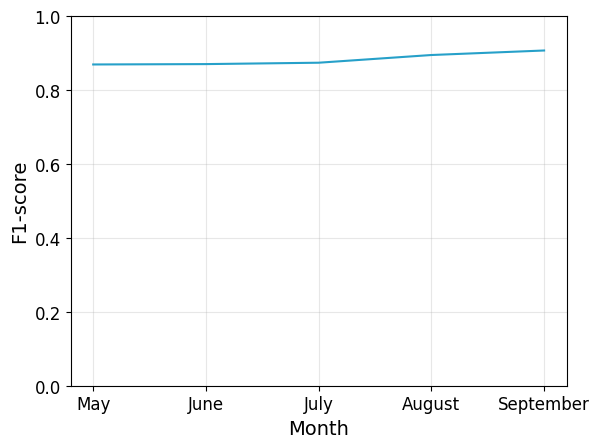

In [ ]:
plt.plot(["May", "June", "July", "August", "September"], f1_scores_test, color='#26A0C9')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.xlabel('Month', fontsize=14)
plt.ylabel('F1-score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("f1ScoreTimeEval.pdf", bbox_inches="tight")
plt.show()

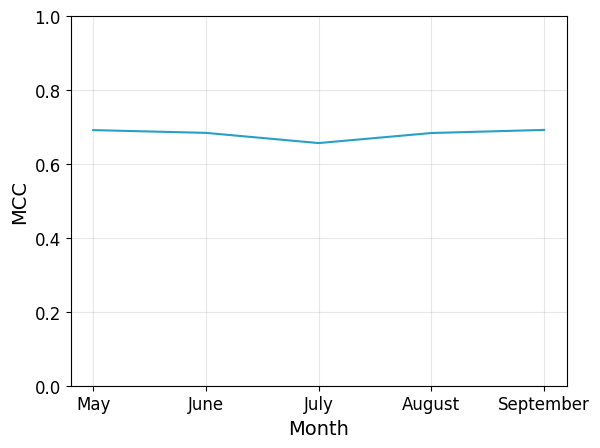

In [ ]:
plt.plot(["May", "June", "July", "August", "September"], MCCs_test, color='#26A0C9')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.xlabel('Month', fontsize=14)
plt.ylabel('MCC', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("mccTimeEval.pdf", bbox_inches="tight")
plt.show()